In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
#from task3a import remove_noise
import matplotlib.pyplot as plt

In [2]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
        A function that removes noise in the input image.
        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    disk = skimage.morphology.disk(10)
    im = skimage.morphology.binary_closing(im, disk)
    im = skimage.morphology.binary_opening(im, disk)
    return im
    ### END YOUR CODE HERE ###

In [3]:
def distance_transform(im: np.ndarray) -> np.ndarray:
    """
        A function that computes the distance to the closest boundary pixel.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.int32
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    assert im.dtype == np.bool
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)
    distance = np.zeros_like(im).astype(np.int32)
    i = 0
    while np.any(im):
        distance[im] = i
        im = skimage.morphology.erosion(im, structuring_element)
        i += 1
    return distance.astype(np.int32)


Reading image: images\noisy.png
Saving image to: image_processed\noisy-distance.png


C:\Studie\NTNU\Visuell Databehandling\IP\TDT4195-StarterCode\assignment3\utils.py:39: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


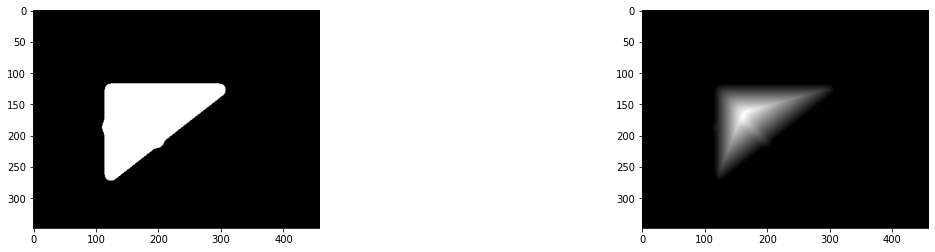

In [4]:
if __name__ == "__main__":
    im = utils.read_image("noisy.png")
    binary_image = (im != 0)
    noise_free_image = remove_noise(binary_image)
    distance = distance_transform(noise_free_image)

    assert im.shape == distance.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, distance.shape)
    assert distance.dtype == np.int32, "Expected resulting image dtype to be np.int32. Was: {}".format(
            distance.dtype)

    distance = utils.to_uint8(distance)
    utils.save_im("noisy-distance.png", distance)
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1) 
    plt.imshow(noise_free_image, cmap='gray')
    plt.subplot(1, 2, 2) 
    plt.imshow(distance, cmap='gray')